# Final Exam

# Challenge Overview

In 1998, the Adventure Works Cycles company collected a large volume of data about their existing customers, including demographic features and information about purchases they have made. The company is particularly interested in analyzing customer data to determine any apparent relationships between demographic features known about the customers and the likelihood of a customer purchasing a bike. Additionally, the analysis should endeavor to determine whether a customer's average monthly spend with the company can be predicted from known customer characteristics.

In this project, you must tackle three challenges:

 + Challenge 1: Explore the data and gain some insights into Adventure Works customer characteristics and purchasing behavior.
 + Challenge 2: Build a classification model to predict customer purchasing behavior.
 + Challenge 3: Build a regression model to predict customer purchasing behavior.
 
This data consists of **three** files, containing data that was collected on **January 1st 1998.**

**AdvWorksCusts.csv**
Customer demographic data consisting of the following fields:

 + **CustomerID** (integer) : A unique customer identifier.
 + **Title** (string):The customer's formal title (Mr, Mrs, Ms, Miss Dr, etc.)
 + **FirstName** (string): The customer's first name.
 + **MiddleName** (string): The customer's middle name.
 + **LastName** (string):The customer's last name.
 + **Suffix** (string):A suffix for the customer name (Jr, Sr, etc.)
 + **AddressLine1** (string): The first line of the customer's home address.
 + **AddressLine2** (string):The second line of the customer's home address.
 + **City** (string):The city where the customer lives.
 + **StateProvince** (string):The state or province where the customer lives.
 + **CountryRegion** (string):The country or region where the customer lives.
 + **PostalCode** (string):The postal code for the customer's address.
 + **PhoneNumber** (string):The customer's telephone number.
 + **BirthDate** (date):The customer's date of birth in the format YYYY-MM-DD.
 + **Education** (string):The maximum level of education achieved by the customer: 
   + Partial High School
   + High School
   + Partial College
   + Bachelors
   + Graduate Degree
 + **Occupation** (string):The type of job in which the customer is employed:
   + Manual
   + Skilled Manual
   + Clerical
   + Management
   + Professional
 + **Gender** (string):The customer's gender (for example, M for male, F for female, etc.)
 + **MaritalStatus** (string): Whether the customer is married (M) or single (S).
 + **HomeOwnerFlag**  (integer):A Boolean flag indicating whether the customer owns their own home (1) or not (0).
 + **NumberCarsOwned** (integer):The number of cars owned by the customer.
 + **NumberChildrenAtHome** (integer):The number of children the customer has who live at home.
 + **TotalChildren**  (integer): The total number of children the customer has.
 + **YearlyIncome** (decimal): The annual income of the customer.

**AW_AveMonthSpend.csv**

Sales data for existing customers, consisting of the following fields:

 + **CustomerID** (integer): The unique identifier for the customer.
 + **AveMonthSpend** (decimal): The amount of money the customer spends with Adventure Works Cycles on average each month.

**AW_BikeBuyer.csv**

Sales data for existing customers, consisting of the following fields:

 + **CustomerID** (integer): The unique identifier for the customer.
 + **BikeBuyer** (integer): A Boolean flag indicating whether a customer has previously purchased a bike (1) or not (0).

# Getting Started

## Importing the libraries

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy.random as nr
import sklearn.model_selection as ms
import sklearn.metrics as sklm
from sklearn import preprocessing
from sklearn import linear_model
import scipy.stats as ss
import math
%matplotlib inline

pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

In [0]:
import os
os.chdir("/content/drive/My Drive/Colab/Microsoft")

## Extracting training data from zip

In [0]:
# importing required modules 
from zipfile import ZipFile 
  
# specifying the zip file name 
file_name = "./Input/FinalExam.zip"
  
# opening the zip file in READ mode 
with ZipFile(file_name, 'r') as zipfile: 
    # printing all the contents of the zip file 
    zipfile.printdir() 
  
    # extracting all the files 
    print('Extracting all the files now...') 
    zipfile.extractall() 
    print('Done!')

File Name                                             Modified             Size
AdvWorksCusts.csv                              2018-04-18 15:27:52      2545537
AW_BikeBuyer.csv                               2018-04-18 15:28:02       148693
AW_AveMonthSpend.csv                           2018-04-18 15:27:58       167346
Extracting all the files now...
Done!


## Reading the file

In [0]:
# Reading the file
AdvWorksCusts = pd.read_csv("AdvWorksCusts.csv")
AW_BikeBuyer = pd.read_csv("AW_BikeBuyer.csv")
AW_AveMonthSpend = pd.read_csv("AW_AveMonthSpend.csv")

# Data Preprocessing

## Checking duplicate records

In [0]:
# Duplicate records
print("Duplicate unique id in AdvWorksCusts:", len(AdvWorksCusts.CustomerID) - len(AdvWorksCusts.CustomerID.unique()))
print("Duplicate unique id in AW_BikeBuyer:", len(AW_BikeBuyer.CustomerID) - len(AW_BikeBuyer.CustomerID.unique()))
print("Duplicate unique id in AW_AveMonthSpend:", len(AW_AveMonthSpend.CustomerID) - len(AW_AveMonthSpend.CustomerID.unique()))

Duplicate unique id in AdvWorksCusts: 115
Duplicate unique id in AW_BikeBuyer: 115
Duplicate unique id in AW_AveMonthSpend: 115


## Removing duplicates rows

In [0]:
# Removing duplicates rows
AdvWorksCusts = AdvWorksCusts.sort_values('CustomerID').drop_duplicates('CustomerID',keep='last')
AW_BikeBuyer = AW_BikeBuyer.sort_values('CustomerID').drop_duplicates('CustomerID',keep='last')
AW_AveMonthSpend = AW_AveMonthSpend.sort_values('CustomerID').drop_duplicates('CustomerID',keep='last')

# Duplicate records
print("Duplicate unique id in AdvWorksCusts:", len(AdvWorksCusts.CustomerID) - len(AdvWorksCusts.CustomerID.unique()))
print("Duplicate unique id in AW_BikeBuyer:", len(AW_BikeBuyer.CustomerID) - len(AW_BikeBuyer.CustomerID.unique()))
print("Duplicate unique id in AW_AveMonthSpend:", len(AW_AveMonthSpend.CustomerID) - len(AW_AveMonthSpend.CustomerID.unique()))

print("Duplicate records removed.")

Duplicate unique id in AdvWorksCusts: 0
Duplicate unique id in AW_BikeBuyer: 0
Duplicate unique id in AW_AveMonthSpend: 0
Duplicate records removed.


## Merging datasets

In [0]:
dataset = pd.merge(AW_AveMonthSpend,AdvWorksCusts,on = 'CustomerID', how = 'left')
print("No of rows and columns in dataset:", dataset.shape)

No of rows and columns in dataset: (16404, 24)


## Checking unique records

In [0]:
print("Unique values in FirstName:" , len(dataset.FirstName.unique()))
print("Unique values in LastName:" , len(dataset.LastName.unique()))
print("Unique values in City:" , len(dataset.City.unique()))
print("Unique values in StateProvinceName:" , len(dataset.StateProvinceName.unique()))
print("Unique values in CountryRegionName:" , len(dataset.CountryRegionName.unique()))
print("Unique values in PostalCode:" , len(dataset.PostalCode.unique()))
print("Unique values in PhoneNumber:" , len(dataset.PhoneNumber.unique()))
print("Unique values in Education:" , len(dataset.Education.unique()))
print("Unique values in Occupation:" , len(dataset.Occupation.unique()))
print("Unique values in Gender:" , len(dataset.Gender.unique()))
print("Unique values in MaritalStatus:" , len(dataset.MaritalStatus.unique()))

Unique values in FirstName: 662
Unique values in LastName: 363
Unique values in City: 267
Unique values in StateProvinceName: 51
Unique values in CountryRegionName: 6
Unique values in PostalCode: 321
Unique values in PhoneNumber: 7949
Unique values in Education: 5
Unique values in Occupation: 5
Unique values in Gender: 2
Unique values in MaritalStatus: 2


## Dropping unnecessary variables

In [0]:
train = dataset.drop(['CustomerID','Title','MiddleName','Suffix','AddressLine1', 'AddressLine2', 'FirstName','LastName','City',
                      'StateProvinceName','PostalCode','PhoneNumber'],axis = 1)
print("No of rows and columns in train:", train.shape)

No of rows and columns in train: (16404, 12)


## Checking missing value

In [0]:
train.isnull().sum()

AveMonthSpend           0
CountryRegionName       0
BirthDate               0
Education               0
Occupation              0
Gender                  0
MaritalStatus           0
HomeOwnerFlag           0
NumberCarsOwned         0
NumberChildrenAtHome    0
TotalChildren           0
YearlyIncome            0
dtype: int64

## Creating New variable : Age

In [0]:
# Creating New variable : Age
train['BirthDate']= pd.to_datetime(train['BirthDate']) 

train['diff'] = pd.to_datetime('1998-01-01') - train['BirthDate']
train['Age'] = train['diff'].apply(lambda x: float(x.days)/365.25)
train = train.drop(['BirthDate', 'diff'], axis =1)

decimals = 0    
train['Age'] = train['Age'].apply(lambda x: round(x, decimals))

train.head()

,AveMonthSpend,CountryRegionName,Education,Occupation,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,Age
0,89,Australia,Bachelors,Professional,M,M,1,0,0,2,137947,32.0
1,117,Australia,Bachelors,Professional,M,S,0,1,3,3,101141,33.0
2,123,Australia,Bachelors,Professional,M,M,1,1,3,3,91945,32.0
3,50,Australia,Bachelors,Professional,F,S,0,1,0,0,86688,30.0
4,95,Australia,Bachelors,Professional,F,S,1,4,5,5,92771,29.0


## Changing datatype

In [0]:
train['HomeOwnerFlag'] = train['HomeOwnerFlag'].astype('object')
train['NumberCarsOwned'] = train['NumberCarsOwned'].astype('object')
train['NumberChildrenAtHome'] = train['NumberChildrenAtHome'].astype('object')
train['TotalChildren'] = train['TotalChildren'].astype('object')
train.dtypes

AveMonthSpend             int64
CountryRegionName        object
Education                object
Occupation               object
Gender                   object
MaritalStatus            object
HomeOwnerFlag            object
NumberCarsOwned          object
NumberChildrenAtHome     object
TotalChildren            object
YearlyIncome              int64
Age                     float64
dtype: object

## Checking distribution of numeric features

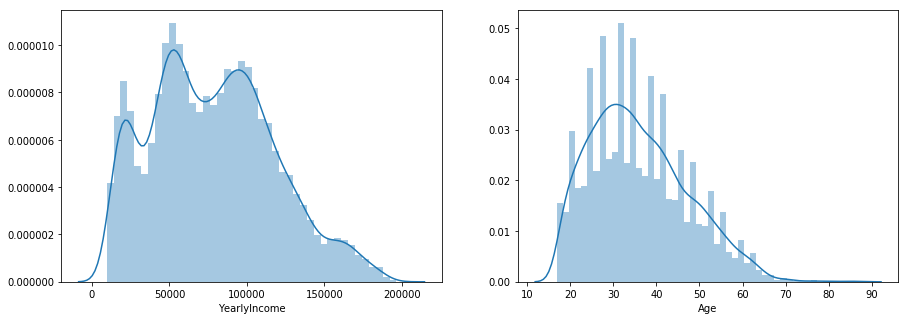

In [0]:
plt.figure(figsize=(15,5));
plt.subplot(1, 2, 1)
sns.distplot(train['YearlyIncome']);
plt.subplot(1, 2, 2)
sns.distplot(train['Age']);

## One hot encoding

In [0]:
# Creating dummy variables
dummy = pd.get_dummies(train[['HomeOwnerFlag','Gender', 'MaritalStatus', 'CountryRegionName', 'Education', 'Occupation', 'NumberCarsOwned','NumberChildrenAtHome', 'TotalChildren']],
                      prefix=['HomeOwnerFlag','Gender', 'MaritalStatus', 'CountryRegionName', 'Education', 'Occupation', 'NumberCarsOwned', 'NumberChildrenAtHome','TotalChildren'],
                      drop_first=True)
# Join the dummy variables to the main dataframe
train = pd.concat([train, dummy], axis=1)

# Dropping original variable
train = train.drop(['HomeOwnerFlag', 'Gender', 'MaritalStatus','CountryRegionName', 'Education', 'Occupation', 'NumberCarsOwned', 'NumberChildrenAtHome', 'TotalChildren'], axis = 1)

print("No of rows and columns in train:", train.shape)

No of rows and columns in train: (16404, 33)


In [0]:
# Variable type
print(train.dtypes)

AveMonthSpend                         int64
YearlyIncome                          int64
Age                                 float64
HomeOwnerFlag_1                       uint8
Gender_M                              uint8
MaritalStatus_S                       uint8
CountryRegionName_Canada              uint8
CountryRegionName_France              uint8
CountryRegionName_Germany             uint8
CountryRegionName_United Kingdom      uint8
CountryRegionName_United States       uint8
Education_Graduate Degree             uint8
Education_High School                 uint8
Education_Partial College             uint8
Education_Partial High School         uint8
Occupation_Management                 uint8
Occupation_Manual                     uint8
Occupation_Professional               uint8
Occupation_Skilled Manual             uint8
NumberCarsOwned_1                     uint8
NumberCarsOwned_2                     uint8
NumberCarsOwned_3                     uint8
NumberCarsOwned_4               

In [0]:
train.head()

,AveMonthSpend,YearlyIncome,Age,HomeOwnerFlag_1,Gender_M,MaritalStatus_S,CountryRegionName_Canada,CountryRegionName_France,CountryRegionName_Germany,CountryRegionName_United Kingdom,CountryRegionName_United States,Education_Graduate Degree,Education_High School,Education_Partial College,Education_Partial High School,Occupation_Management,Occupation_Manual,Occupation_Professional,Occupation_Skilled Manual,NumberCarsOwned_1,NumberCarsOwned_2,NumberCarsOwned_3,NumberCarsOwned_4,NumberChildrenAtHome_1,NumberChildrenAtHome_2,NumberChildrenAtHome_3,NumberChildrenAtHome_4,NumberChildrenAtHome_5,TotalChildren_1,TotalChildren_2,TotalChildren_3,TotalChildren_4,TotalChildren_5
0,89,137947,32.0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,117,101141,33.0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0
2,123,91945,32.0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0
3,50,86688,30.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,95,92771,29.0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1


## Creating X & y

In [0]:
# Creating final training data for classification problem
X = train.drop(['AveMonthSpend'], axis = 1)
y = train['AveMonthSpend']

## Split the data

In [0]:
from sklearn.model_selection import train_test_split
SEED = 2000

x_train, x_validation_and_test, y_train, y_validation_and_test = train_test_split(X, y, test_size= 0.3, random_state=SEED)
x_validation, x_test, y_validation, y_test = train_test_split(x_validation_and_test, y_validation_and_test, test_size= 0.5, random_state=SEED)

In [0]:
train_size = len(x_train)
validation_size = len(x_validation)
test_size = len(x_test)

train_stats = (train_size)
validation_stats = (validation_size)
test_stats = (test_size)

data_types = ('train', 'validation', 'test')
validation_summary_stats = pd.DataFrame([train_stats, validation_stats, test_stats])
validation_summary_stats.columns = ['samplesize']
validation_summary_stats.index = data_types
validation_summary_stats

,samplesize
train,11482
validation,2461
test,2461


## Feature Scaling

In [0]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

x_train[['YearlyIncome', 'Age']] = scaler.fit_transform(x_train[['YearlyIncome', 'Age']])
x_validation[['YearlyIncome', 'Age']] = scaler.transform(x_validation[['YearlyIncome', 'Age']])
x_test[['YearlyIncome', 'Age']] = scaler.transform(x_test[['YearlyIncome', 'Age']])

x_train.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/inde

,YearlyIncome,Age,HomeOwnerFlag_1,Gender_M,MaritalStatus_S,CountryRegionName_Canada,CountryRegionName_France,CountryRegionName_Germany,CountryRegionName_United Kingdom,CountryRegionName_United States,Education_Graduate Degree,Education_High School,Education_Partial College,Education_Partial High School,Occupation_Management,Occupation_Manual,Occupation_Professional,Occupation_Skilled Manual,NumberCarsOwned_1,NumberCarsOwned_2,NumberCarsOwned_3,NumberCarsOwned_4,NumberChildrenAtHome_1,NumberChildrenAtHome_2,NumberChildrenAtHome_3,NumberChildrenAtHome_4,NumberChildrenAtHome_5,TotalChildren_1,TotalChildren_2,TotalChildren_3,TotalChildren_4,TotalChildren_5
1841,0.222907,0.086957,1,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0
13044,0.073743,0.362319,0,1,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
13374,0.420053,0.362319,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0
2646,0.019756,0.536232,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1
6652,0.097573,0.086957,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
# No of variable
feature_count = x_train.shape[1]
print("No of features:", feature_count)

No of features: 32


## Testing different models

### Linear Regression

In [0]:
## define and fit the linear regression model
lin_mod = linear_model.LinearRegression(fit_intercept = True)
lin_mod.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
print(lin_mod.intercept_)
print(lin_mod.coef_)

y_predicted = lin_mod.predict(x_validation)
print(y_predicted)

38.58102905803154
[ 4.09022197e+01 -9.79322605e+00 -1.57701608e-02  2.80280945e+01
 -6.13333121e+00  9.79546414e-01  6.38121428e-01  3.43285068e-01
  2.46556008e-01  3.30879606e-01 -2.38023676e+00 -1.07583762e-01
 -2.14942459e-01 -2.27428793e-01 -3.01269519e+00 -7.75523384e-01
 -1.50623770e-01 -3.71881573e-02 -2.20710745e-01 -1.01879217e+00
 -1.54553115e+00 -1.38895713e+00  1.02165946e+01  2.02945595e+01
  3.06582252e+01  4.29768691e+01  5.62440944e+01  9.75154390e-01
  1.55867906e+00  2.02936192e+00  1.71513998e+00  1.89759226e+00]
[109.20161461  67.42541642  42.50905896 ...  80.7938554   85.50976081
  36.06020549]


In [0]:
def print_metrics(y_true, y_predicted, n_parameters):
    ## First compute R^2 and the adjusted R^2
    r2 = sklm.r2_score(y_true, y_predicted)
    r2_adj = r2 - (y_validation.shape[0] - 1)/(y_validation.shape[0] - n_parameters - 1) * (1 - r2)
    
    ## Print the usual metrics and the R^2 values
    print('Mean Square Error      = ' + str(sklm.mean_squared_error(y_true, y_predicted)))
    print('Root Mean Square Error = ' + str(math.sqrt(sklm.mean_squared_error(y_true, y_predicted))))
    print('Mean Absolute Error    = ' + str(sklm.mean_absolute_error(y_true, y_predicted)))
    print('Median Absolute Error  = ' + str(sklm.median_absolute_error(y_true, y_predicted)))
    print('R^2                    = ' + str(r2))
    print('Adjusted R^2           = ' + str(r2_adj))
    
print_metrics(y_validation, y_predicted, feature_count)

Mean Square Error      = 37.46524888667417
Root Mean Square Error = 6.120886282775899
Mean Absolute Error    = 4.660354454976721
Median Absolute Error  = 3.589043109654469
R^2                    = 0.9448320688141933
Adjusted R^2           = 0.8889370479257731


### Comparison of different models

In [0]:
from sklearn.svm import LinearSVR, SVR
from sklearn.linear_model import LinearRegression, SGDRegressor, Ridge, Lasso, PassiveAggressiveRegressor, Perceptron
from sklearn.neighbors import KNeighborsRegressor, NearestCentroid
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor, RandomForestRegressor, GradientBoostingRegressor 
from xgboost import XGBRegressor
from sklearn.feature_selection import SelectFromModel
from sklearn.pipeline import Pipeline
from time import time
from sklearn.metrics import mean_squared_error, mean_absolute_error, median_absolute_error, r2_score, accuracy_score

In [0]:
def accuracy_summary(Regressor, x_train, y_train, x_validation, y_validation, n_parameters):
    t0 = time()
    model = Regressor.fit(x_train, y_train)
    y_pred = model.predict(x_validation)
    train_test_time = time() - t0
    R2 = sklm.r2_score(y_validation, y_pred)
    R2_adj = R2 - (y_validation.shape[0] - 1)/(y_validation.shape[0] - n_parameters - 1) * (1 - R2)
    MSE = sklm.mean_squared_error(y_validation, y_pred)
    RMSE = math.sqrt(sklm.mean_squared_error(y_validation, y_pred))
    MAE = sklm.mean_absolute_error(y_validation, y_pred)
    MdAE = sklm.median_absolute_error(y_validation, y_pred)
    return R2, R2_adj, MSE, RMSE, MAE, MdAE, train_test_time

In [0]:
seed = 123
names = ["Linear Regression", "SGDRegressor", "Linear SVR",
         "Support Vector Machine with Gaussian kernel", "Ridge", "Lasso", "Perceptron",
         "Passive-Aggresive", "KNeighborsRegressor","NearestCentroid",
        "DecisionTreeRegressor","RandomForestRegressor","AdaBoostRegressor",
         "GradientBoostingRegressor", "XGBRegressor"]

Regressors = [
    LinearRegression(),
    SGDRegressor(random_state=seed),
    LinearSVR(random_state=seed),
    SVR(),
    Ridge(random_state=seed),
    Lasso(random_state=seed),
    Perceptron(random_state=seed),
    PassiveAggressiveRegressor(random_state=seed),
    KNeighborsRegressor(metric = 'jaccard'),
    NearestCentroid(metric = 'jaccard'),
    DecisionTreeRegressor(criterion = 'mse', random_state = seed),
    RandomForestRegressor(criterion = 'mse', random_state = seed),
    AdaBoostRegressor(random_state = seed),
    GradientBoostingRegressor(random_state = seed),
    XGBRegressor(random_state = seed)
    ]

zipped_reg = zip(names,Regressors)

def Regressor_comparator(Regressor=zipped_reg):
    result = []
    for n,r in Regressor:
        checker_pipeline = Pipeline([
            ('Regressor', r)
        ])
        print("Validation result for {}".format(n))
        print (r)
        R2, R2_adj, MSE, RMSE, MAE, MdAE,tt_time = accuracy_summary(checker_pipeline, x_train, y_train, x_validation, y_validation, feature_count)
        result.append((n,R2, R2_adj, MSE, RMSE, MAE, MdAE,tt_time))
    return result

In [0]:
Regressor_result = Regressor_comparator()
Regressor_result

Validation result for Linear Regression
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
Validation result for SGDRegressor
SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.01, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty='l2', power_t=0.25, random_state=123,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)
Validation result for Linear SVR
LinearSVR(C=1.0, dual=True, epsilon=0.0, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
          random_state=123, tol=0.0001, verbose=0)
Validation result for Support Vector Machine with Gaussian kernel
SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Validation result for Ridge
Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=123, solver='auto', tol=0.001)
Validation result for Lasso
Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=123,
      selection='cyclic', tol=0.0001, warm_start=False)
Validation result for Perceptron
Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=1.0,
           fit_intercept=True, max_iter=1000, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=123, shuffle=True, tol=0.001,
           validation_fraction=0.1, verbose=0, warm_start=False)
Validation result for Passive-Aggresive
PassiveAggressiveRegressor(C=1.0, average=False, early_stopping=False,
                           epsilon=0.1, fit_intercept=True,
                           loss='epsilon_insensitive', max_iter=1000,
                           n_iter_no_change=5, random_

/usr/local/lib/python3.6/dist-packages/sklearn/neighbors/nearest_centroid.py:141: UserWarning: Averaging for metrics other than euclidean and manhattan not supported. The average is set to be the mean.
  warnings.warn("Averaging for metrics other than "
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/pairwise.py:1575: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Validation result for AdaBoostRegressor
AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
                  n_estimators=50, random_state=123)
Validation result for GradientBoostingRegressor
GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='auto',
                          random_state=123, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)
Validation result for XGBRegressor
XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsam

/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[('Linear Regression',
  0.9448320688141933,
  0.8889370479257731,
  37.46524888667417,
  6.120886282775899,
  4.660354454976721,
  3.589043109654469,
  0.02262711524963379),
 ('SGDRegressor',
  0.944822666165328,
  0.8889181187051578,
  37.47163434598654,
  6.121407872866056,
  4.67233167354772,
  3.627612001238596,
  0.21274113655090332),
 ('Linear SVR',
  0.9395379965700308,
  0.878279129832912,
  41.06052117599666,
  6.407848404573618,
  4.393921048211517,
  3.1473549149137057,
  0.038521766662597656),
 ('Support Vector Machine with Gaussian kernel',
  0.8865918929748943,
  0.7716891156759815,
  77.01689847951545,
  8.775927214802744,
  5.457821587452527,
  3.3594845157750655,
  13.210543394088745),
 ('Ridge',
  0.9448822281135383,
  0.8890380276025432,
  37.4311850638418,
  6.118103060903911,
  4.658545423860091,
  3.598292165896268,
  0.007979393005371094),
 ('Lasso',
  0.8099870595557577,
  0.6174698299458581,
  129.04022232510036,
  11.35958724272587,
  8.718989258844974,
  7.1

In [0]:
Regressor_result_df = pd.DataFrame(Regressor_result)
Regressor_result_df.columns = ['Regressor', 'R2 Score', 'R2_adj Score', 'MSE',
                                'RMSE', 'MAE', 'MdAE', 'Train and test time']
Regressor_result_df.sort_values(by='RMSE', ascending=True)

,Regressor,R2 Score,R2_adj Score,MSE,RMSE,MAE,MdAE,Train and test time
11,RandomForestRegressor,0.981429,0.962613,12.612003,3.551338,2.835758,2.400000,0.501337
13,GradientBoostingRegressor,0.981331,0.962415,12.678657,3.560710,2.805225,2.318667,1.123896
14,XGBRegressor,0.980607,0.960959,13.169760,3.629016,2.861437,2.363083,0.887264
10,DecisionTreeRegressor,0.970342,0.940294,20.141000,4.487873,3.574563,3.000000,0.077035
4,Ridge,0.944882,0.889038,37.431185,6.118103,4.658545,3.598292,0.007979
0,Linear Regression,0.944832,0.888937,37.465249,6.120886,4.660354,3.589043,0.022627
1,SGDRegressor,0.944823,0.888918,37.471634,6.121408,4.672332,3.627612,0.212741
2,Linear SVR,0.939538,0.878279,41.060521,6.407848,4.393921,3.147355,0.038522
7,Passive-Aggresive,0.919718,0.838377,54.520783,7.383819,5.770796,4.750327,0.059431
8,KNeighborsRegressor,0.890530,0.779618,74.342284,8.622197,5.613409,3.600000,2.478490


## Final Regressor : Random Forest

In [0]:
# Final Regressor
model = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators='warn',
                      n_jobs=None, oob_score=False, random_state=123, verbose=0,
                      warm_start=False)

model = model.fit(x_train, y_train)
y_predict = model.predict(x_validation)

print_metrics(y_validation, y_predict, feature_count)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Mean Square Error      = 12.612003250711096
Root Mean Square Error = 3.551338233780485
Mean Absolute Error    = 2.835757822023568
Median Absolute Error  = 2.4000000000000057
R^2                    = 0.9814287066514623
Adjusted R^2           = 0.9626126516113459


## Final validation accuracy

In [0]:
y_predict = model.predict(x_test)
print_metrics(y_test, y_predict, feature_count)

Mean Square Error      = 12.497472572125153
Root Mean Square Error = 3.535176455585372
Mean Absolute Error    = 2.8028443722064202
Median Absolute Error  = 2.3999999999999986
R^2                    = 0.9837447443164627
Adjusted R^2           = 0.967275251325729


# Prediction for Test data

In [0]:
# specifying the zip file name 
file_name = "./Input/FinalExam-Test.zip"
  
# opening the zip file in READ mode 
with ZipFile(file_name, 'r') as zipfile_test: 
    # printing all the contents of the zip file 
    zipfile_test.printdir() 
  
    # extracting all the files 
    print('Extracting all the files now...') 
    zipfile_test.extractall() 
    print('Done!')

File Name                                             Modified             Size
AW_test.csv                                    2018-06-25 13:01:50        76923
Extracting all the files now...
Done!


In [0]:
# Reading the file
AW_test = pd.read_csv("AW_test.csv")

In [0]:
# Duplicate records
print("Duplicate unique id in AW_test:", len(AW_test.CustomerID) - len(AW_test.CustomerID.unique()))

Duplicate unique id in AW_test: 0


In [0]:
print("No of rows and columns in test before dropping:", AW_test.shape)
test = AW_test.drop(['CustomerID','Title','MiddleName','Suffix','AddressLine1', 'AddressLine2', 'FirstName','LastName','City',
                      'StateProvinceName','PostalCode','PhoneNumber'],axis = 1)
print("No of rows and columns in test:", test.shape)

No of rows and columns in test before dropping: (500, 23)
No of rows and columns in test: (500, 11)


In [0]:
test.isnull().sum()

CountryRegionName       0
BirthDate               0
Education               0
Occupation              0
Gender                  0
MaritalStatus           0
HomeOwnerFlag           0
NumberCarsOwned         0
NumberChildrenAtHome    0
TotalChildren           0
YearlyIncome            0
dtype: int64

In [0]:
# Creating New variable : Age
test['BirthDate']= pd.to_datetime(test['BirthDate']) 

test['diff'] = pd.to_datetime('1998-01-01') - test['BirthDate']
test['Age'] = test['diff'].apply(lambda x: float(x.days)/365.25)
test = test.drop(['BirthDate', 'diff'], axis =1)

decimals = 0    
test['Age'] = test['Age'].apply(lambda x: round(x, decimals))

test.head()

,CountryRegionName,Education,Occupation,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,Age
0,United States,Bachelors,Management,F,S,0,2,0,5,86931,53.0
1,Canada,Bachelors,Skilled Manual,M,M,1,2,2,4,100125,33.0
2,United States,Graduate Degree,Management,F,M,1,2,0,4,103985,64.0
3,United States,Graduate Degree,Skilled Manual,M,M,1,0,0,4,127161,39.0
4,France,High School,Manual,F,M,1,1,2,2,21876,33.0


In [0]:
print("No of rows and columns in test:", test.shape)

test['HomeOwnerFlag'] = test['HomeOwnerFlag'].astype('object')
test['NumberCarsOwned'] = test['NumberCarsOwned'].astype('object')
test['NumberChildrenAtHome'] = test['NumberChildrenAtHome'].astype('object')
test['TotalChildren'] = test['TotalChildren'].astype('object')

# Creating dummy variables
dummy = pd.get_dummies(test[['HomeOwnerFlag','Gender', 'MaritalStatus', 'CountryRegionName', 'Education', 'Occupation', 'NumberCarsOwned','NumberChildrenAtHome', 'TotalChildren']],
                      prefix=['HomeOwnerFlag','Gender', 'MaritalStatus', 'CountryRegionName', 'Education', 'Occupation', 'NumberCarsOwned', 'NumberChildrenAtHome','TotalChildren'],
                      drop_first=True)
# Join the dummy variables to the main dataframe
test = pd.concat([test, dummy], axis=1)

# Dropping original variable
test = test.drop(['HomeOwnerFlag', 'Gender', 'MaritalStatus','CountryRegionName', 'Education', 'Occupation', 'NumberCarsOwned', 'NumberChildrenAtHome', 'TotalChildren'], axis = 1)

# Feature Scaling
test[['YearlyIncome', 'Age']] = scaler.transform(test[['YearlyIncome', 'Age']])

print("No of rows and columns in test:", test.shape)

print(test.dtypes)
test.head()

No of rows and columns in test: (500, 11)
No of rows and columns in test: (500, 32)
YearlyIncome                        float64
Age                                 float64
HomeOwnerFlag_1                       uint8
Gender_M                              uint8
MaritalStatus_S                       uint8
CountryRegionName_Canada              uint8
CountryRegionName_France              uint8
CountryRegionName_Germany             uint8
CountryRegionName_United Kingdom      uint8
CountryRegionName_United States       uint8
Education_Graduate Degree             uint8
Education_High School                 uint8
Education_Partial College             uint8
Education_Partial High School         uint8
Occupation_Management                 uint8
Occupation_Manual                     uint8
Occupation_Professional               uint8
Occupation_Skilled Manual             uint8
NumberCarsOwned_1                     uint8
NumberCarsOwned_2                     uint8
NumberCarsOwned_3                   

,YearlyIncome,Age,HomeOwnerFlag_1,Gender_M,MaritalStatus_S,CountryRegionName_Canada,CountryRegionName_France,CountryRegionName_Germany,CountryRegionName_United Kingdom,CountryRegionName_United States,Education_Graduate Degree,Education_High School,Education_Partial College,Education_Partial High School,Occupation_Management,Occupation_Manual,Occupation_Professional,Occupation_Skilled Manual,NumberCarsOwned_1,NumberCarsOwned_2,NumberCarsOwned_3,NumberCarsOwned_4,NumberChildrenAtHome_1,NumberChildrenAtHome_2,NumberChildrenAtHome_3,NumberChildrenAtHome_4,NumberChildrenAtHome_5,TotalChildren_1,TotalChildren_2,TotalChildren_3,TotalChildren_4,TotalChildren_5
0,0.414102,0.521739,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
1,0.484647,0.231884,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0
2,0.505285,0.681159,1,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
3,0.629202,0.318841,1,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,0.066268,0.231884,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0


In [0]:
y_predict_test = model.predict(test)
Submission = pd.DataFrame()
Submission['CustomerID'] = AW_test['CustomerID']
Submission['AveMonthSpend'] = y_predict_test

Submission.head()

,CustomerID,AveMonthSpend
0,18988,47.4
1,29135,112.7
2,12156,43.9
3,13749,86.0
4,27780,57.5


In [0]:
Submission.to_csv("./Output/Submission_regression_v1.csv", index = False)